##*Get the data*

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

##*Inspect the data*


In [ ]:
!dir pizza_steak/test/steak

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random, os, cv2

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread((target_folder + "/" + random_image[0]), 3)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


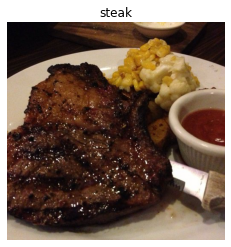

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
img/255

array([[[0.01176471, 0.01176471, 0.05098039],
        [0.01176471, 0.01176471, 0.05098039],
        [0.01176471, 0.01176471, 0.05098039],
        ...,
        [0.08235294, 0.05490196, 0.03137255],
        [0.0745098 , 0.05882353, 0.02352941],
        [0.0745098 , 0.05882353, 0.02352941]],

       [[0.01568627, 0.01568627, 0.05490196],
        [0.01568627, 0.01568627, 0.05490196],
        [0.01568627, 0.01568627, 0.05490196],
        ...,
        [0.07843137, 0.05098039, 0.02745098],
        [0.07843137, 0.05098039, 0.01960784],
        [0.07843137, 0.05098039, 0.01960784]],

       [[0.01960784, 0.01960784, 0.05882353],
        [0.01960784, 0.01960784, 0.05882353],
        [0.01960784, 0.01960784, 0.05098039],
        ...,
        [0.08235294, 0.05490196, 0.03137255],
        [0.08235294, 0.05490196, 0.02352941],
        [0.08235294, 0.05490196, 0.02352941]],

       ...,

       [[0.77647059, 0.69019608, 0.59607843],
        [0.77647059, 0.69019608, 0.59607843],
        [0.78431373, 0

# A typical architecture of convolutional neural network
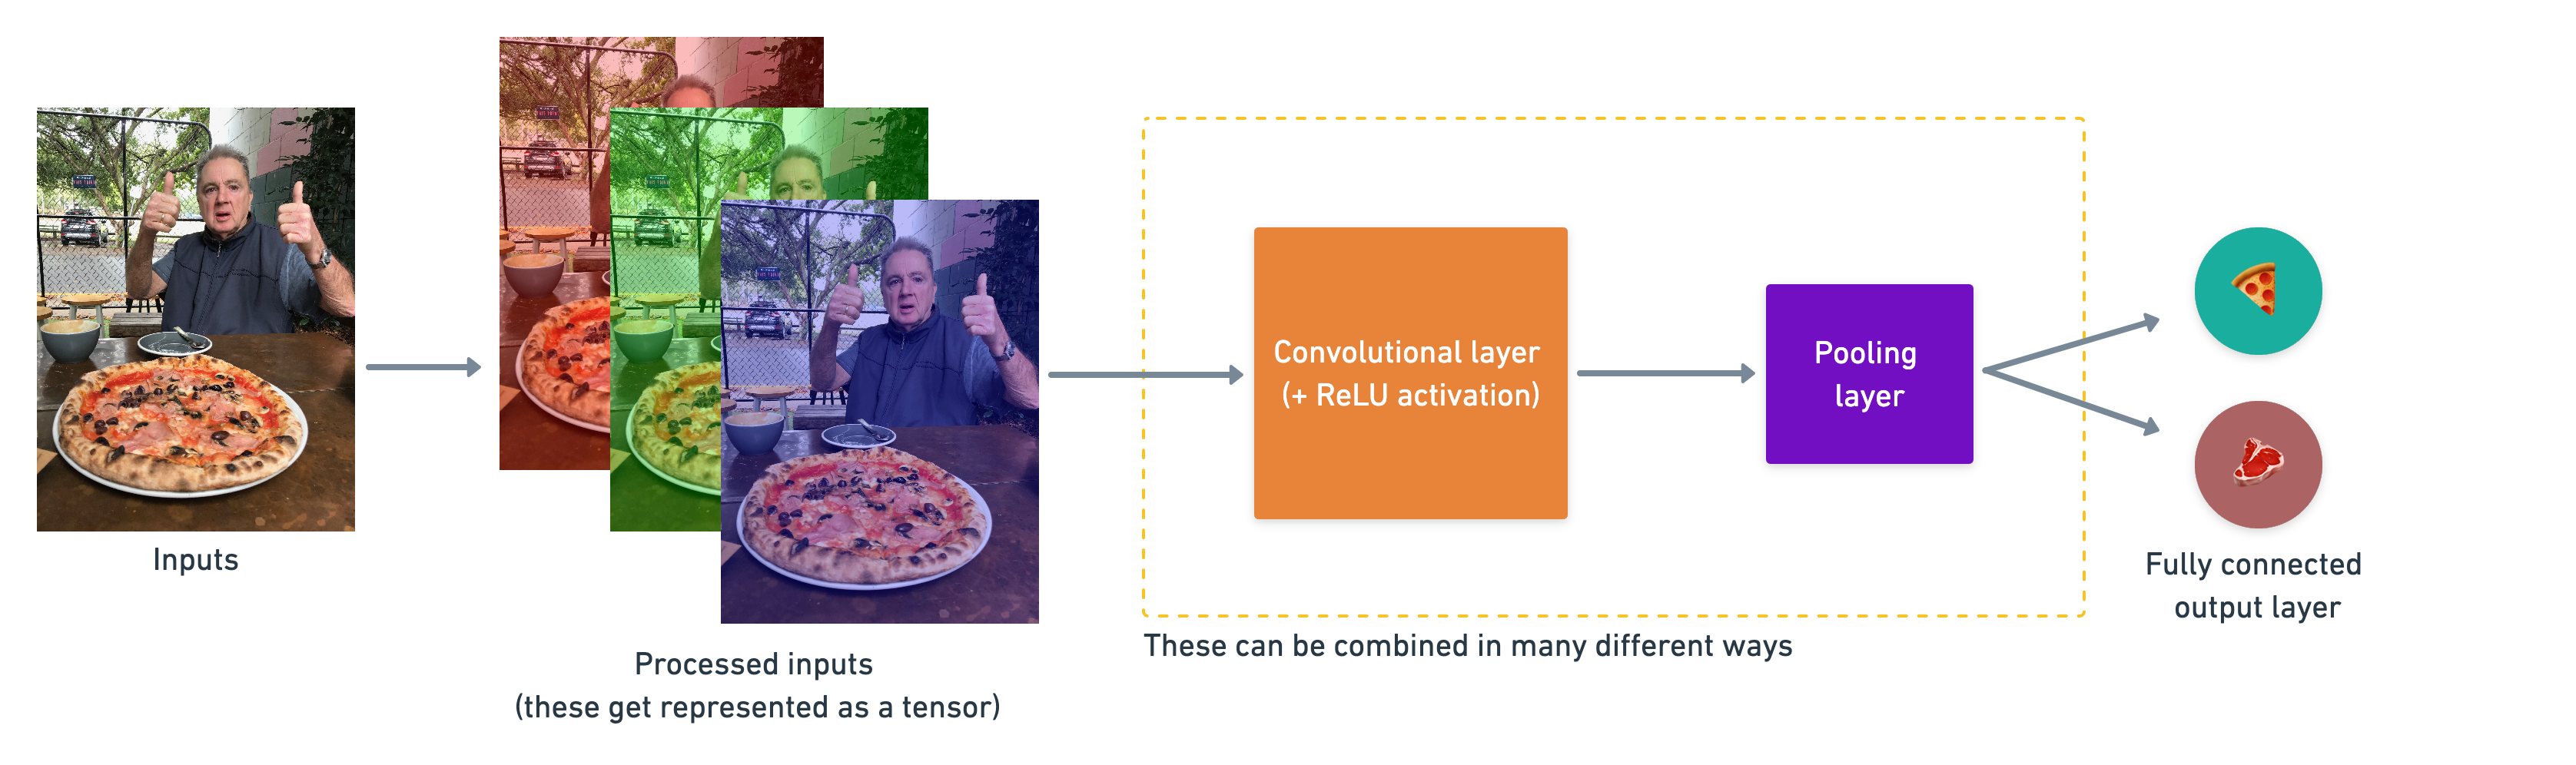


##*Binary classification*

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size= 32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])


# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch= len(train_data),
                        validation_data= valid_data,
                        validation_steps= len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5657 - accuracy: 0.7240 - val_loss: 0.4351 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4216 - accuracy: 0.8107 - val_loss: 0.3540 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3842 - accuracy: 0.8307 - val_loss: 0.2973 - val_accuracy: 0.8780
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3593 - accuracy: 0.8380 - val_loss: 0.3295 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3420 - accuracy: 0.8453 - val_loss: 0.2855 - val_accuracy: 0.8780


In [ ]:
# Check out the layers in our model
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 1.2620 - accuracy: 0.5027 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.4853 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                 602116    
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch= len(train_data),
                        validation_data= valid_data,
                        validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 2.0643 - accuracy: 0.6427 - val_loss: 0.5423 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.7296 - accuracy: 0.7020 - val_loss: 0.9463 - val_accuracy: 0.6180
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6568 - accuracy: 0.7360 - val_loss: 0.4255 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.5107 - accuracy: 0.7773 - val_loss: 0.4315 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4793 - accuracy: 0.7813 - val_loss: 0.4772 - val_accuracy: 0.7680


In [ ]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_6 (Dense)             (None, 100)               15052900  
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


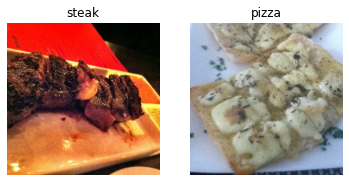

In [ ]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/test/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

##*Preprocess the data*

In [ ]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Turn it into batches

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of the training data batch 
images, labels = test_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.5686275 , 0.54509807, 0.5529412 ],
          [0.59607846, 0.57254905, 0.5882353 ],
          [0.60784316, 0.5803922 , 0.60784316],
          ...,
          [0.69803923, 0.6666667 , 0.5921569 ],
          [0.6901961 , 0.65882355, 0.58431375],
          [0.69411767, 0.6509804 , 0.5803922 ]],
 
         [[0.5686275 , 0.54509807, 0.56078434],
          [0.59607846, 0.56078434, 0.5803922 ],
          [0.60784316, 0.5686275 , 0.6       ],
          ...,
          [0.69803923, 0.6666667 , 0.5921569 ],
          [0.69411767, 0.6627451 , 0.5882353 ],
          [0.6862745 , 0.6431373 , 0.57254905]],
 
         [[0.5803922 , 0.54509807, 0.5647059 ],
          [0.60784316, 0.5647059 , 0.5882353 ],
          [0.6156863 , 0.57254905, 0.6039216 ],
          ...,
          [0.6901961 , 0.65882355, 0.58431375],
          [0.68235296, 0.6509804 , 0.5764706 ],
          [0.6901961 , 0.64705884, 0.5764706 ]],
 
         ...,
 
         [[0.61960787, 0.77647066, 0.8235295 ],
          [0.62745

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
      dtype=float32)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 203ms/step - loss: 1.4939 - accuracy: 0.6480 - val_loss: 0.4648 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4599 - accuracy: 0.7967 - val_loss: 0.4069 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3589 - accuracy: 0.8593 - val_loss: 0.3977 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.2047 - accuracy: 0.9260 - val_loss: 0.4527 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.0834 - accuracy: 0.9767 - val_loss: 0.6791 - val_accuracy: 0.7480


##*Evaluate the data*

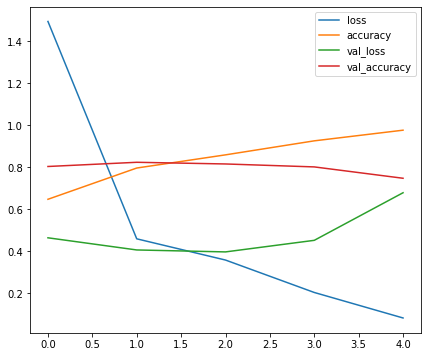

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(7, 6));

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

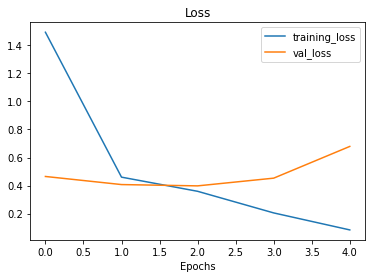

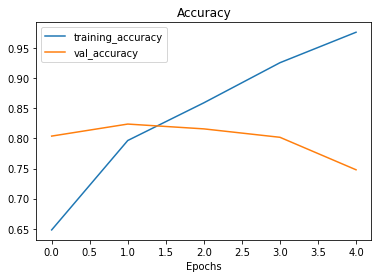

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [ ]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 0.6197 - accuracy: 0.6473 - val_loss: 0.4486 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4771 - accuracy: 0.7880 - val_loss: 0.3967 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4280 - accuracy: 0.8180 - val_loss: 0.3548 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3956 - accuracy: 0.8273 - val_loss: 0.3533 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3947 - accuracy: 0.8233 - val_loss: 0.3334 - val_accuracy: 0.8660


# Adjust the model parameters

In [ ]:
# Check out the model architecture
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 10)      

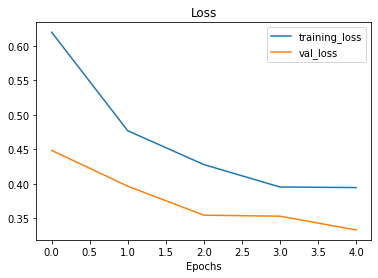

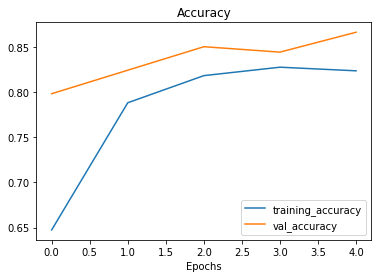

In [ ]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

##*Data augmentation*

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.4, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

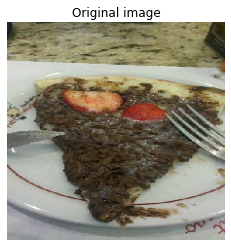

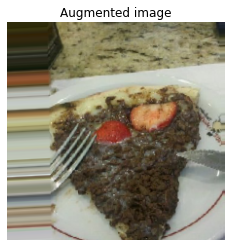

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 462ms/step - loss: 0.7221 - accuracy: 0.4607 - val_loss: 0.6849 - val_accuracy: 0.6000
Epoch 2/5
47/47 [==============================] - 21s 453ms/step - loss: 0.6866 - accuracy: 0.5760 - val_loss: 0.6543 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 21s 457ms/step - loss: 0.6784 - accuracy: 0.6120 - val_loss: 0.6522 - val_accuracy: 0.5780
Epoch 4/5
47/47 [==============================] - 22s 472ms/step - loss: 0.6681 - accuracy: 0.6300 - val_loss: 0.5712 - val_accuracy: 0.7540
Epoch 5/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6187 - accuracy: 0.6727 - val_loss: 0.5184 - val_accuracy: 0.7440


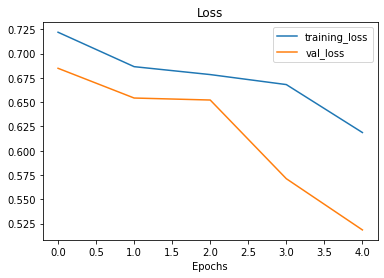

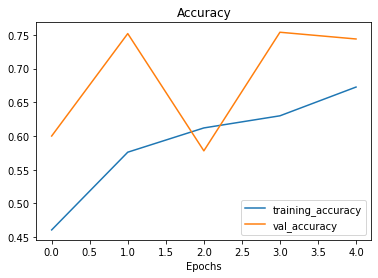

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6348 - accuracy: 0.6407 - val_loss: 0.4939 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 21s 455ms/step - loss: 0.4981 - accuracy: 0.7660 - val_loss: 0.3632 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 21s 451ms/step - loss: 0.4933 - accuracy: 0.7607 - val_loss: 0.4144 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 21s 452ms/step - loss: 0.4634 - accuracy: 0.7840 - val_loss: 0.3257 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 21s 455ms/step - loss: 0.4820 - accuracy: 0.7680 - val_loss: 0.3834 - val_accuracy: 0.8420


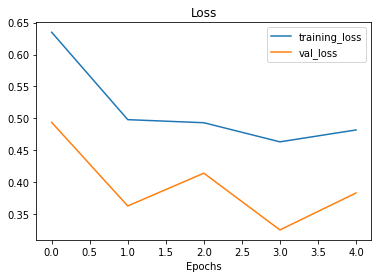

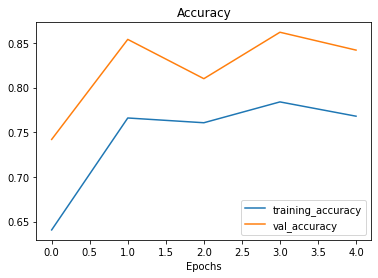

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

##*Repeat until satisfied*

In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 468ms/step - loss: 0.6400 - accuracy: 0.6447 - val_loss: 0.4558 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 22s 460ms/step - loss: 0.5366 - accuracy: 0.7320 - val_loss: 0.4152 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 22s 463ms/step - loss: 0.5301 - accuracy: 0.7493 - val_loss: 0.3976 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 22s 464ms/step - loss: 0.4910 - accuracy: 0.7740 - val_loss: 0.3659 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 22s 463ms/step - loss: 0.4806 - accuracy: 0.7793 - val_loss: 0.3646 - val_accuracy: 0.8520


In [ ]:
# Check model_1 architecture (same as model_8)
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
# Check model_1 architecture (same as model_8)
model_8.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_23 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_25 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

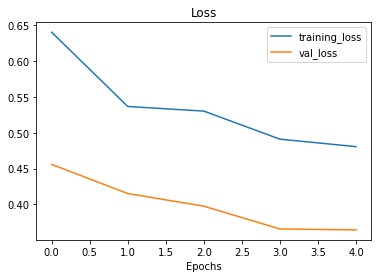

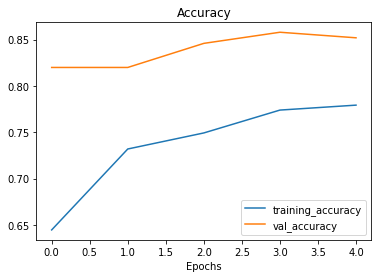

In [ ]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

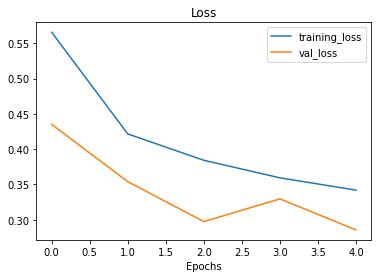

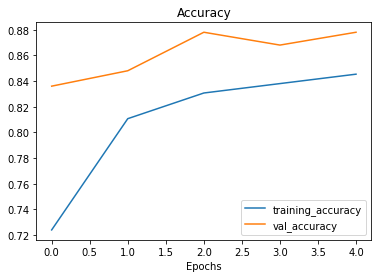

In [ ]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_1)

# Making a prediction with our trained model

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


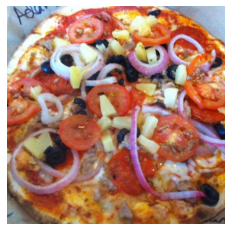

In [ ]:
pizza = mpimg.imread("piza.jpg")
plt.imshow(pizza)
plt.axis(False);

In [ ]:
# Check the shape of our image
pizza.shape

(512, 512, 3)

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape= 224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
pizza = load_and_prep_image("piz3.jpg")
pizza

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.66894263, 0.5865897 , 0.6454132 ],
        [0.6785139 , 0.59616095, 0.6549845 ],
        [0.66020656, 0.59045863, 0.6532037 ],
        ...,
        [0.84593886, 0.9708685 , 0.985154  ],
        [0.8714287 , 0.98459387, 0.9682647 ],
        [0.8929798 , 0.9924197 , 0.96468824]],

       [[0.6657213 , 0.58336836, 0.6421919 ],
        [0.6783788 , 0.5960259 , 0.6548494 ],
        [0.67099464, 0.6012467 , 0.6639918 ],
        ...,
        [0.8420173 , 0.9668494 , 0.98118365],
        [0.87536657, 0.9885317 , 0.9725653 ],
        [0.8996675 , 0.9976254 , 0.9741773 ]],

       [[0.6771721 , 0.5948192 , 0.6536427 ],
        [0.679293  , 0.59694004, 0.65576357],
        [0.67523885, 0.6054909 , 0.6682361 ],
        ...,
        [0.8420173 , 0.96526647, 0.97675705],
        [0.87563044, 0.98879564, 0.97282916],
        [0.90849376, 1.        , 0.980865  ]],

       ...,

       [[0.9764706 , 0.99607843, 0.972549  ],
        [0.97

In [ ]:
pred = model_8.predict(pizza)
pred

ValueError: ignored

In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {pizza.shape}")
pizza = tf.expand_dims(pizza, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {pizza.shape}")
pizza

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.66894263, 0.5865897 , 0.6454132 ],
         [0.6785139 , 0.59616095, 0.6549845 ],
         [0.66020656, 0.59045863, 0.6532037 ],
         ...,
         [0.84593886, 0.9708685 , 0.985154  ],
         [0.8714287 , 0.98459387, 0.9682647 ],
         [0.8929798 , 0.9924197 , 0.96468824]],

        [[0.6657213 , 0.58336836, 0.6421919 ],
         [0.6783788 , 0.5960259 , 0.6548494 ],
         [0.67099464, 0.6012467 , 0.6639918 ],
         ...,
         [0.8420173 , 0.9668494 , 0.98118365],
         [0.87536657, 0.9885317 , 0.9725653 ],
         [0.8996675 , 0.9976254 , 0.9741773 ]],

        [[0.6771721 , 0.5948192 , 0.6536427 ],
         [0.679293  , 0.59694004, 0.65576357],
         [0.67523885, 0.6054909 , 0.6682361 ],
         ...,
         [0.8420173 , 0.96526647, 0.97675705],
         [0.87563044, 0.98879564, 0.97282916],
         [0.90849376, 1.        , 0.980865  ]],

        ...,

        [[0.9764706 , 0.99607843, 

In [ ]:
pred = model_8.predict(pizza)
print(pred)


1/1 [==============================] - 0s 148ms/step
[[0.81854]]


In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
print(pred_class)


steak


In [ ]:
print(int(tf.round(pred)))

1


In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]


  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 18ms/step


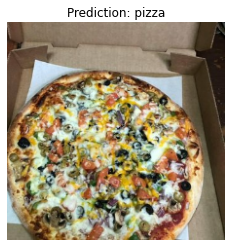

In [ ]:
# Test our model on a custom image
pred_and_plot(model_8, "piza1.jpg", class_names)

1/1 [==============================] - 0s 15ms/step


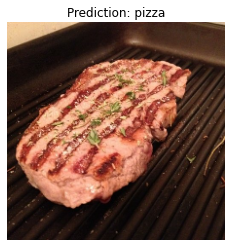

In [ ]:
# Test our model on a custom image
pred_and_plot(model_8, "steak5.jpg", class_names)

##*Multiclass classification*
##*Import and become one with the data*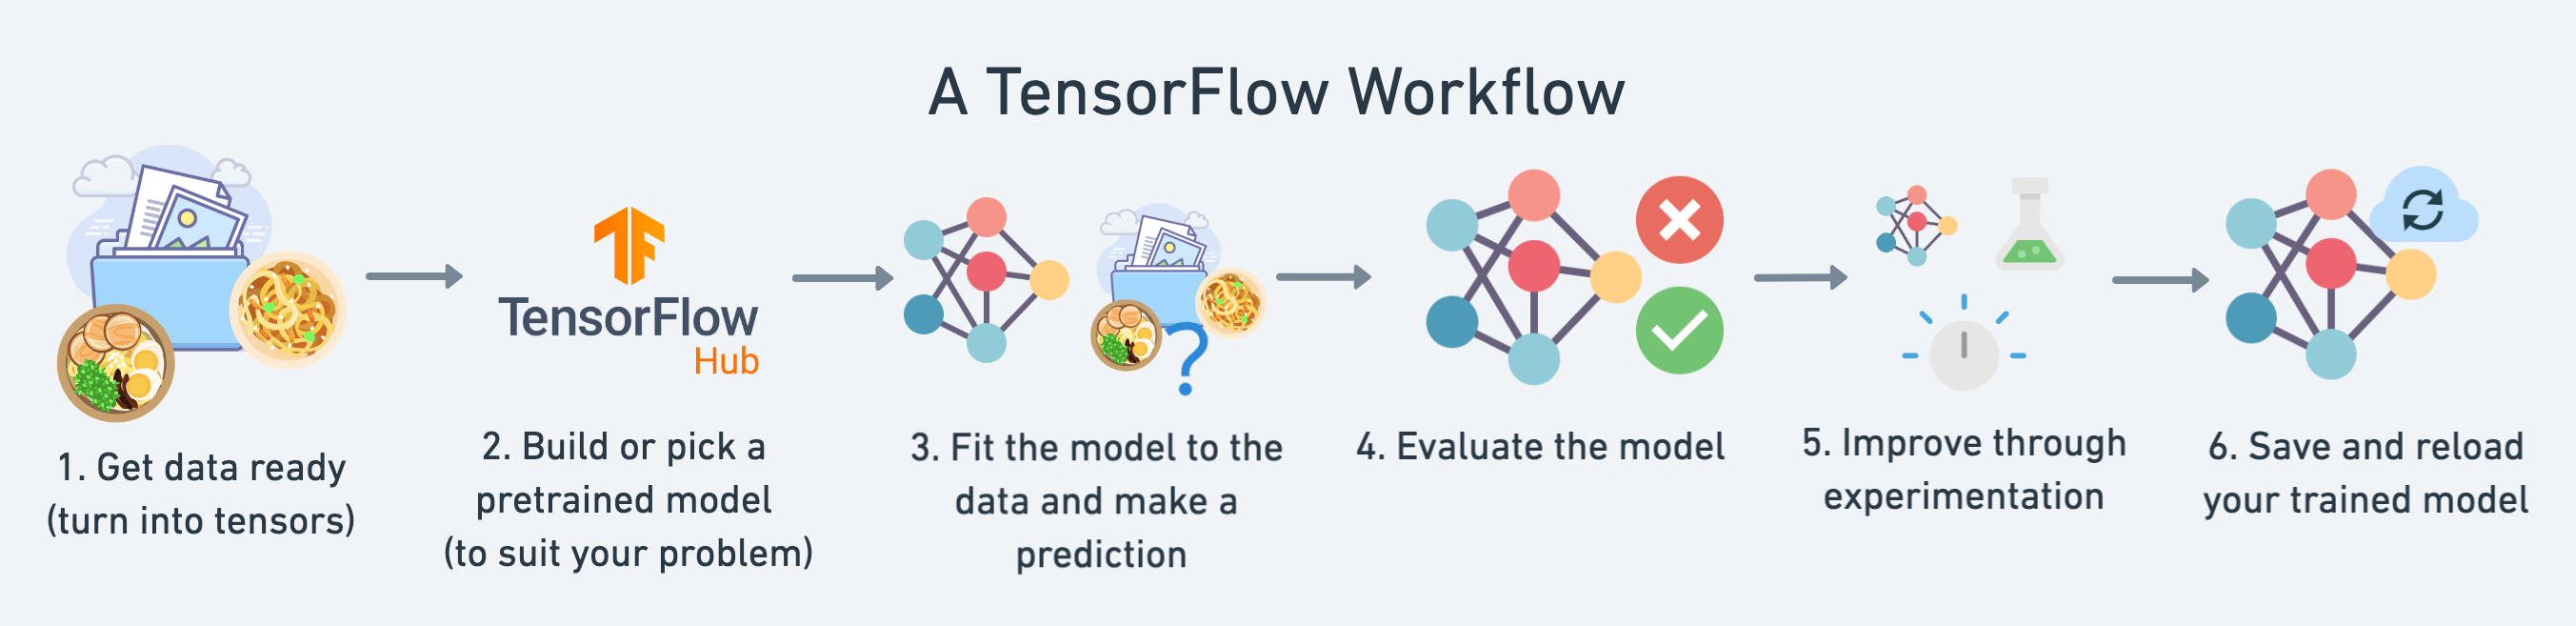

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-10-18 12:20:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   223MB/s    in 2.2s    

2022-10-18 12:20:11 (223 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



##*Preprocess the data (prepare it for a model)*

In [ ]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir= train_dir,
                        target_class= random.choice(class_names)) # get a random class name

NameError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


##*Create a model (start with a baseline)*

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

##*Fit the model*

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 53s 188ms/step - loss: 2.1151 - accuracy: 0.2308 - val_loss: 2.0054 - val_accuracy: 0.2912
Epoch 2/5
235/235 [==============================] - 44s 187ms/step - loss: 1.8584 - accuracy: 0.3668 - val_loss: 1.8738 - val_accuracy: 0.3424
Epoch 3/5
235/235 [==============================] - 44s 187ms/step - loss: 1.4909 - accuracy: 0.5060 - val_loss: 1.9508 - val_accuracy: 0.3484
Epoch 4/5
235/235 [==============================] - 45s 190ms/step - loss: 0.9170 - accuracy: 0.7036 - val_loss: 2.4306 - val_accuracy: 0.3176
Epoch 5/5
235/235 [==============================] - 44s 186ms/step - loss: 0.4009 - accuracy: 0.8753 - val_loss: 3.2995 - val_accuracy: 0.3032


##*Evaluate the model*

In [ ]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 3.2995 - accuracy: 0.3032


[3.299546003341675, 0.30320000648498535]

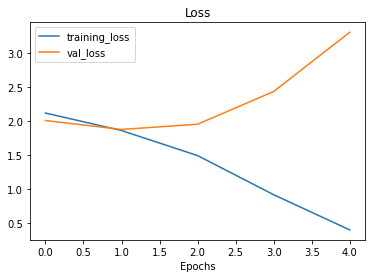

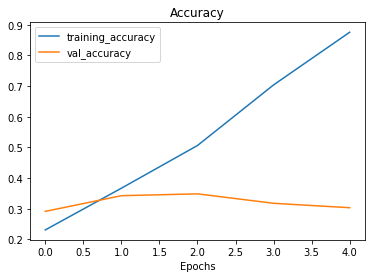

In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

##*Adjust the model parameters*

In [ ]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 179ms/step - loss: 2.1885 - accuracy: 0.2065 - val_loss: 1.9695 - val_accuracy: 0.2956
Epoch 2/5
235/235 [==============================] - 42s 178ms/step - loss: 1.8030 - accuracy: 0.3855 - val_loss: 1.8877 - val_accuracy: 0.3444
Epoch 3/5
235/235 [==============================] - 42s 181ms/step - loss: 1.3111 - accuracy: 0.5761 - val_loss: 2.0445 - val_accuracy: 0.3296
Epoch 4/5
235/235 [==============================] - 42s 178ms/step - loss: 0.7790 - accuracy: 0.7599 - val_loss: 2.3799 - val_accuracy: 0.3228
Epoch 5/5
235/235 [==============================] - 42s 178ms/step - loss: 0.3807 - accuracy: 0.8960 - val_loss: 2.8685 - val_accuracy: 0.3084


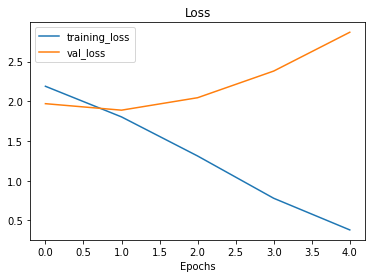

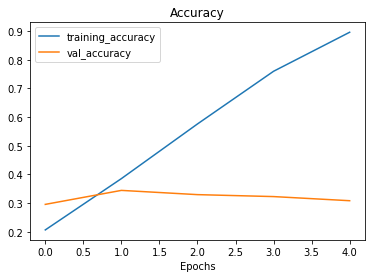

In [ ]:
plot_loss_curves(history_10)

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


##*Repeat until satisfied*

In [ ]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 106s 449ms/step - loss: 2.1772 - accuracy: 0.1989 - val_loss: 2.0275 - val_accuracy: 0.2800
Epoch 2/5
235/235 [==============================] - 104s 443ms/step - loss: 2.0653 - accuracy: 0.2655 - val_loss: 1.9699 - val_accuracy: 0.3176
Epoch 3/5
235/235 [==============================] - 105s 447ms/step - loss: 2.0077 - accuracy: 0.2892 - val_loss: 1.8790 - val_accuracy: 0.3324
Epoch 4/5
235/235 [==============================] - 104s 443ms/step - loss: 1.9687 - accuracy: 0.3159 - val_loss: 1.8035 - val_accuracy: 0.3664
Epoch 5/5
235/235 [==============================] - 104s 445ms/step - loss: 1.9403 - accuracy: 0.3255 - val_loss: 1.7771 - val_accuracy: 0.3956


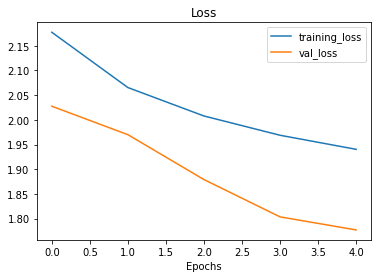

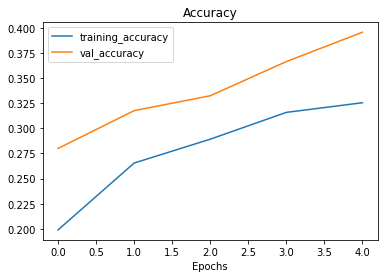

In [ ]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

##*Making a prediction with our trained model*

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_11, 
              filename="steak3.jpg", 
              class_names=class_names)

NotFoundError: ignored

1/1 [==============================] - 0s 19ms/step
[[0.0294947  0.01677593 0.02685463 0.02252844 0.04017571 0.00996412
  0.68694204 0.01812794 0.02553574 0.1236007 ]]


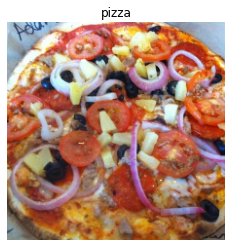

In [ ]:
# Load in and preprocess our custom image
img = load_and_prep_image("piza.jpg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))
print(pred)
# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [ ]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
print(pred)
print(len(pred[0]))

1/1 [==============================] - 0s 15ms/step
[[0.0294947  0.01677593 0.02685463 0.02252844 0.04017571 0.00996412
  0.68694204 0.01812794 0.02553574 0.1236007 ]]
10


In [ ]:
# Find the predicted class name
class_names[pred.argmax()]

'pizza'

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 35ms/step


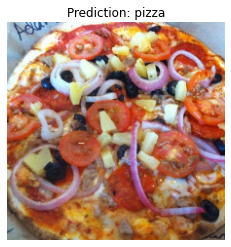

In [ ]:
pred_and_plot(model_11, "piza.jpg", class_names)

## *Saving and loading our model*

In [ ]:
# Save a model
model_11.save("saved_trained_model")

In [ ]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 1.7771 - accuracy: 0.3956


[1.7771354913711548, 0.39559999108314514]

In [ ]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 10s 132ms/step - loss: 1.7771 - accuracy: 0.3956


[1.7771354913711548, 0.39559999108314514]